In [2]:
import torch
import numpy as np
from models.vit_lit import VitModel
import matplotlib.pyplot as plt
import glob,os

In [10]:
path = 'runs/Vit_minimum/1layer_different_graph/checkpoints'
path = glob.glob(f'{path}/*') # * means all if need specific format then *.csv
file = max(path, key=os.path.getctime)
model = VitModel.load_from_checkpoint(file)
file

'runs/Vit_minimum/1layer_different_graph/checkpoints/Vit_minimum-epoch=58-valid_loss=2.34e-05.ckpt'

In [11]:
def generate1():
    a = np.array([np.random.randn()+3,np.random.randn()+3, np.random.randn()-3,np.random.randn()-3])
    a = (a - np.min(a))/(np.max(a)-np.min(a))

    return np.array([np.array(a).reshape(2,2)])

def generate2():
    a = np.array([np.random.randn()-3,np.random.randn()-3, np.random.randn()+3,np.random.randn()+3])
    a = (a - np.min(a))/(np.max(a)-np.min(a))

    return np.array([np.array(a).reshape(2,2)])

data_num = 4
inputs = np.array([ generate1() for _ in range(data_num)] + [ generate2() for _ in range(data_num)])
outputs = np.array([ 0 for _ in range(data_num)] + [ 1 for _ in range(data_num)])


input = torch.tensor(inputs, dtype=torch.float32)
output = torch.tensor(outputs, dtype=torch.int64)


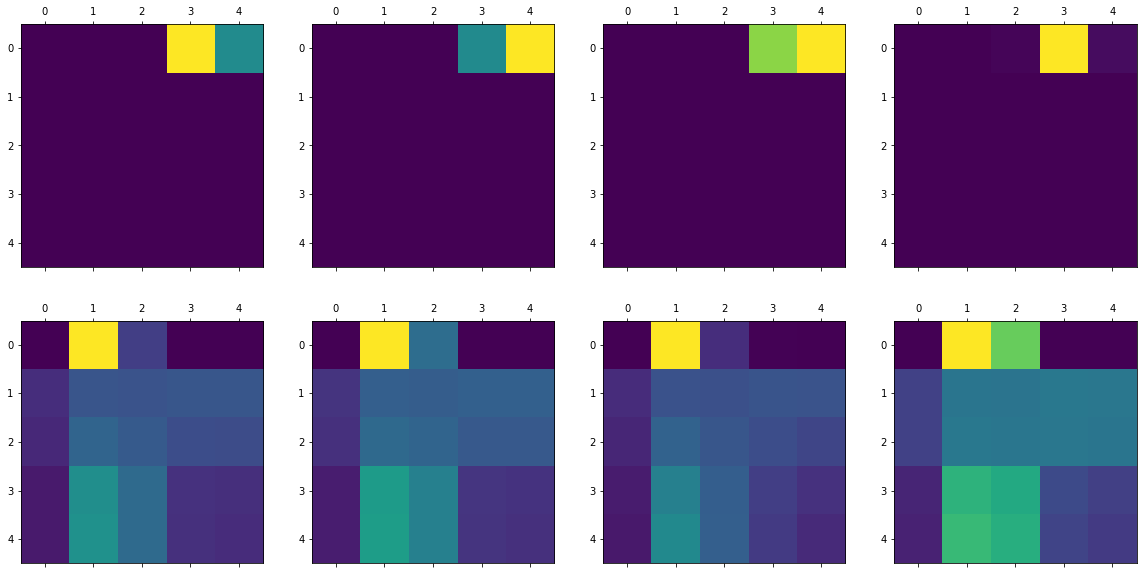

In [12]:
# layers = 3
# model.eval()
# r, w = model(input[[3]])
# fig, ax = plt.subplots(1,layers)

# for i in range(layers):
#     ax[i].matshow(w[i][0,0].detach().numpy())


model.eval()
fig, ax = plt.subplots(2,4, figsize=(20,10))


for i in range(4):
    r, w = model(input[[i]])
    a = w[0][0,0].detach().numpy()
    a[1:]=0
    ax[0][i].matshow(a)

for i in range(4,8):
    r, w = model(input[[i]])
    a = w[0][0,0].detach().numpy()
    # a[1:]=0
    ax[1][i-4].matshow(a)

In [13]:
def plot_graph(i):
# i is the index of input want to plot
    import numpy as np
    import networkx as nx
    import matplotlib.pyplot as plt

    fig,ax = plt.subplots(1,2, figsize=(10,5))

    r, w = model(input[[i]])
    A = w[0][0,0].detach().numpy()
    A[1:] = 0
    temp = nx.MultiGraph()
    G = nx.from_numpy_matrix(A, create_using=temp)
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
    pos = {0:(0,0), 1:(-1,1),2:(1,1),3:(-1,-1), 4:(1,-1)}
    ax[0].matshow(input[[i]][0,0].numpy())
    nx.draw(G, pos, with_labels = True, edge_color=weights, edge_cmap=plt.cm.Greys, ax=ax[1])

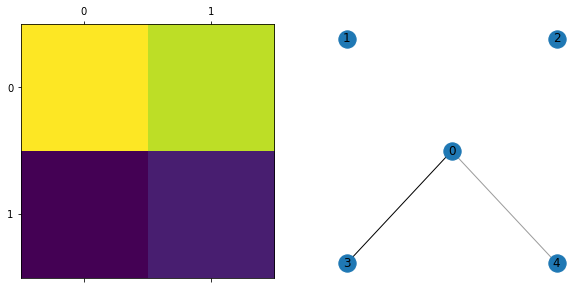

In [14]:
plot_graph(0)

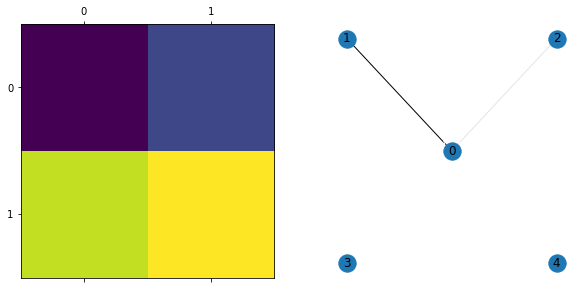

In [15]:
plot_graph(4)